# Project 2

First off I want to apologize for the state of this notebook. I tried to keep it clean but it has become almost illegible to even me the one who created it. Goodluck and godspeed.

## Introduction

I wanted to determine the correlation between music genre and mental health to determine if there were anyway we can predict if a person is in a bad mental state based on the music they were listening to.

In [94]:
#!pip install scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
from sklearn.preprocessing import LabelEncoder

In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('mxmh_survey_results.csv')

In [97]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Preprocessing

First I wanted to get rid of some unnecessary features like Timestamp and permissions which are just information taken during the physical survey.

In [98]:
df = df.drop(['Timestamp','Permissions'], axis=1)

In [99]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


Then I wanted to split up the four different columns pertaining to mental health (Anxiety, Depression, Insomnia, OCD) into an average rating of those features.

In [100]:
df['Mental Health Avg'] = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean(axis=1)

def categorize_avg(value):
    if 0 <= value < 2:
        return 'Lower'
    elif 2 <= value < 4:
        return 'Low'
    elif 4 <= value < 6:
        return 'Medium'
    elif 6 <= value < 8:
        return 'High'
    elif 8 <= value <= 10:
        return 'Extreme'

df['Mental Health Category'] = df['Mental Health Avg'].apply(categorize_avg)



In [101]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental Health Avg,Mental Health Category
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,1.00,Lower
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,3.00,Low
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,6.50,High
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,5.50,Medium
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,5.75,Medium


I can drop the avg column now that I have the data in different labels.

Now I need to use one hot encoding to convert the string entries to integers and create a whole bunch of columns.

In [102]:
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Mental Health Avg', 'Mental Health Category'],
      dtype='object')

In [103]:
df = df.drop(['Anxiety','Depression','Insomnia','OCD', 'Mental Health Avg', 'BPM'], axis=1)

In [104]:
df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
Frequency [Video game music]     object


In [105]:
practicDF = df.copy()

In [106]:
practicDF.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
Frequency [Video game music]     object


In [107]:
practicDF = pd.get_dummies(practicDF, columns = ['Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Music effects'], dtype=int)

In [108]:
practicDF.head(30)

,Age,Hours per day,Mental Health Category,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,While working_No,...,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen
0,18.0,3.0,Lower,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63.0,1.5,Low,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,18.0,4.0,High,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
3,61.0,2.5,Medium,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,18.0,4.0,Medium,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5,18.0,5.0,High,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
6,18.0,3.0,Medium,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7,21.0,1.0,Medium,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,19.0,6.0,Lower,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
9,18.0,1.0,Low,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [110]:
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Mental Health Category'],
      dtype='object')

### JK I do not like one hot encoding to determine feature importance so I am switching to label encoding

In [111]:
object_columns = ['Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Music effects']


In [112]:
le = LabelEncoder()

In [113]:
for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [114]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Mental Health Category
0,18.0,4,3.0,1,1,1,8,1,1,1,...,3,1,0,3,2,3,0,2,3,Lower
1,63.0,3,1.5,1,0,0,14,1,0,2,...,2,1,0,2,2,1,3,1,3,Low
2,18.0,4,4.0,0,0,0,15,0,1,0,...,0,2,2,1,0,1,1,3,1,High
3,61.0,5,2.5,1,0,1,6,1,1,2,...,3,2,0,2,2,0,0,0,0,Medium
4,18.0,4,4.0,1,0,0,12,1,0,0,...,2,2,0,2,3,3,0,1,0,Medium


Now that the data has been preprocessed I can move to creating a model.

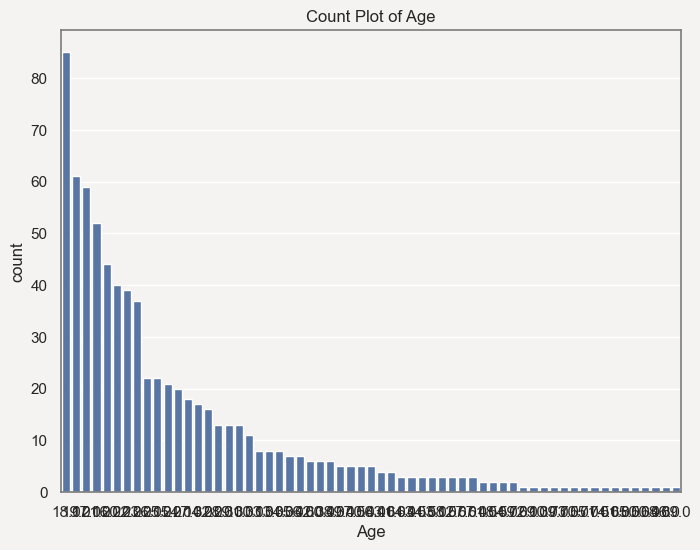

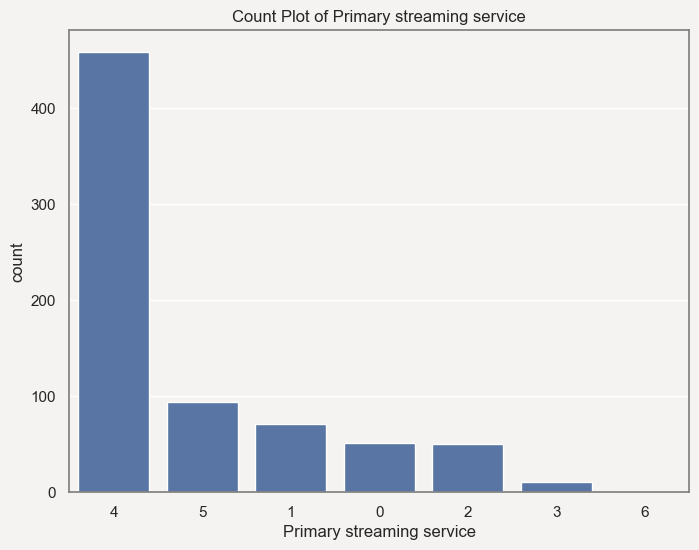

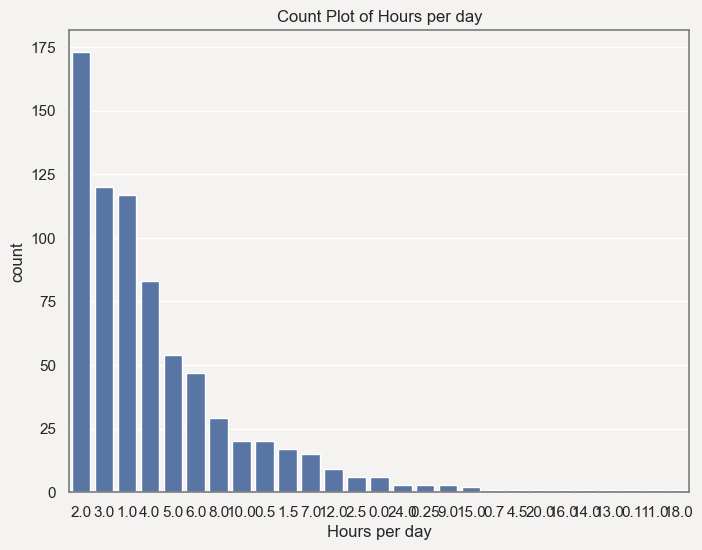

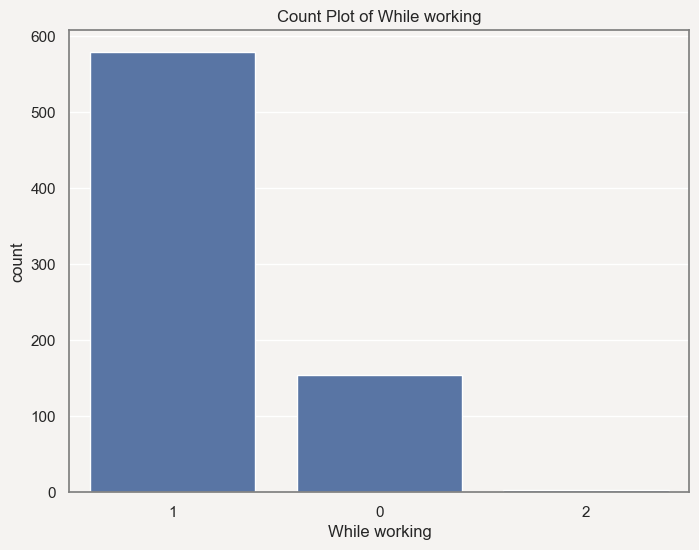

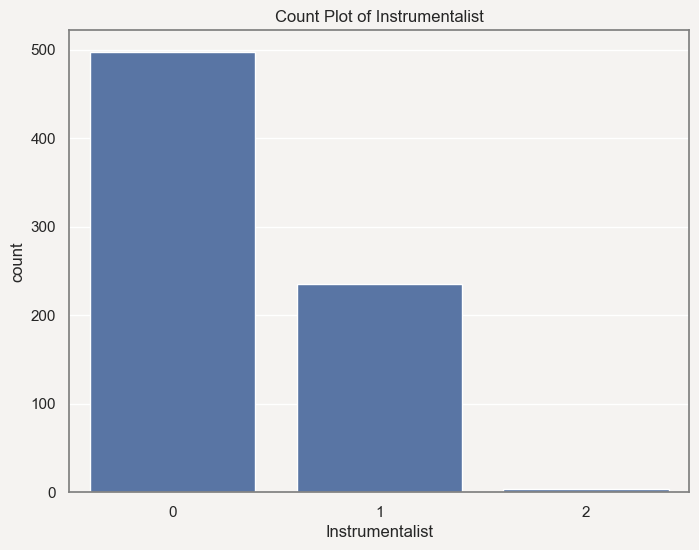

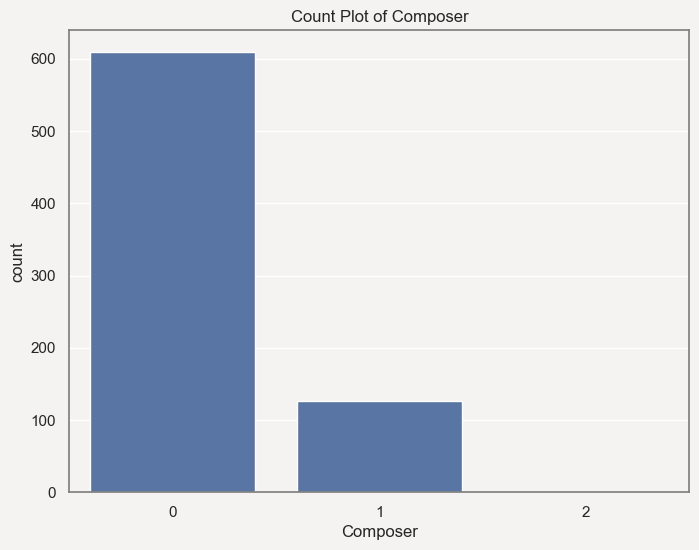

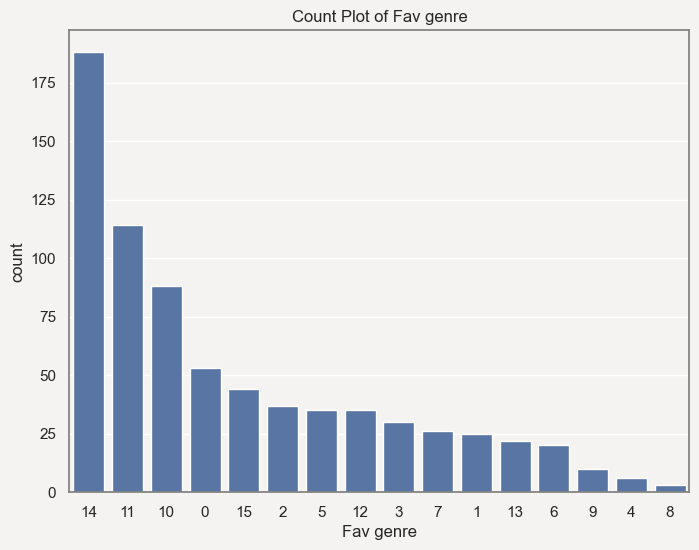

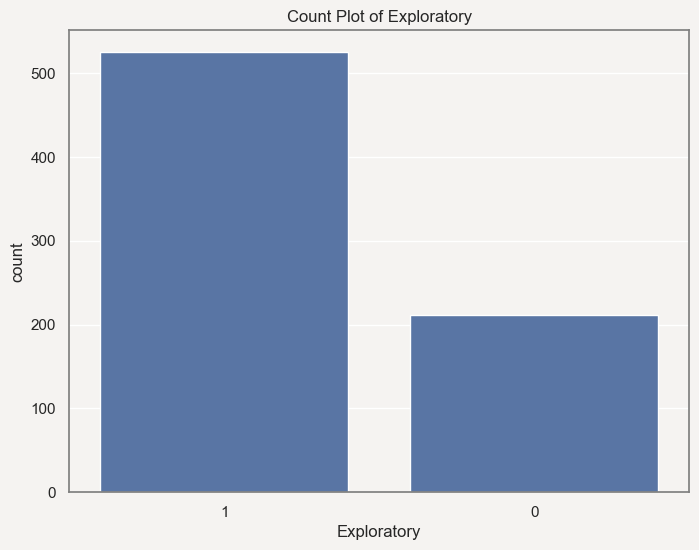

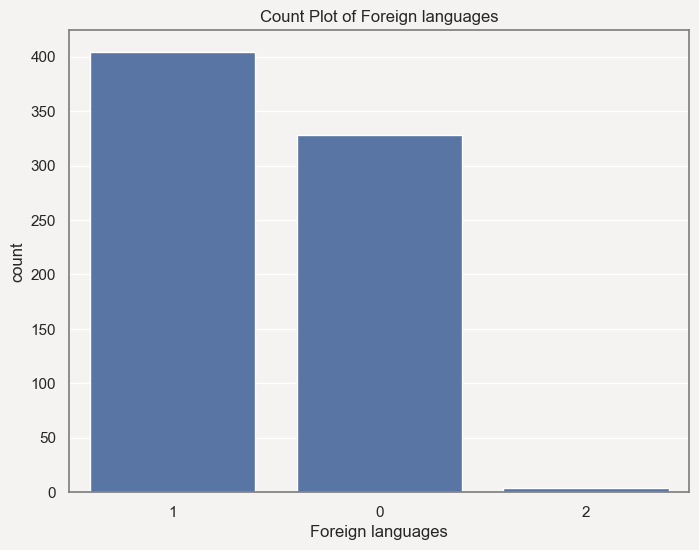

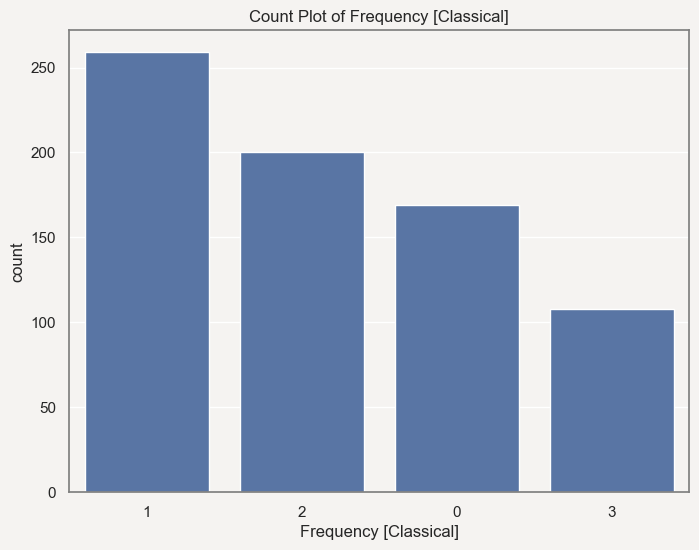

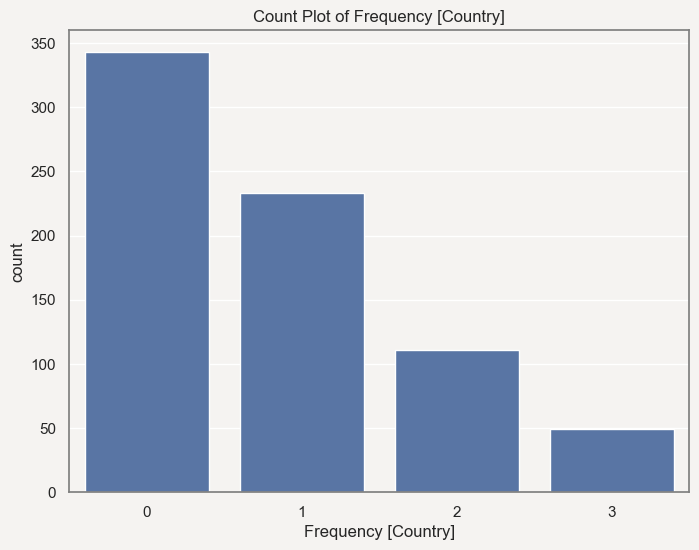

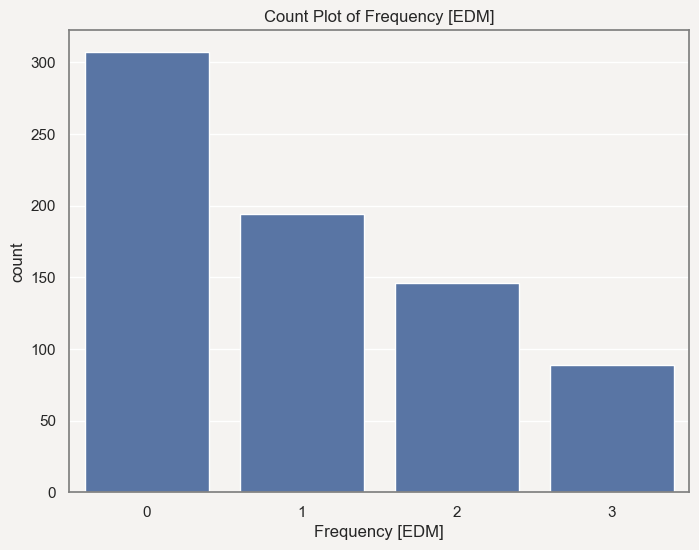

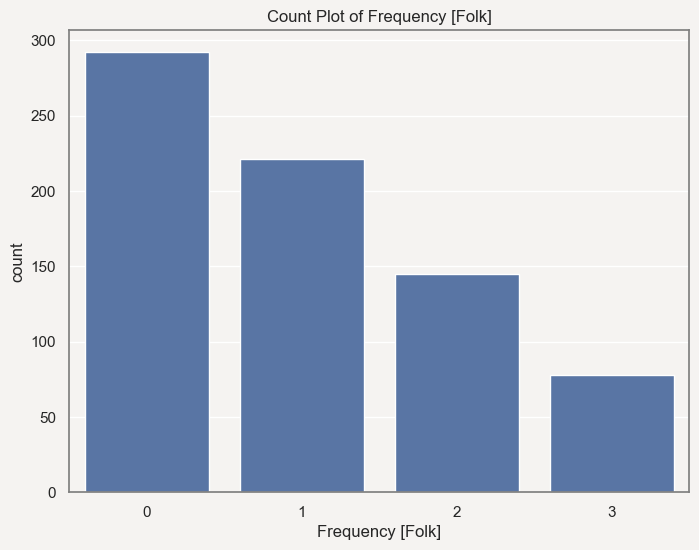

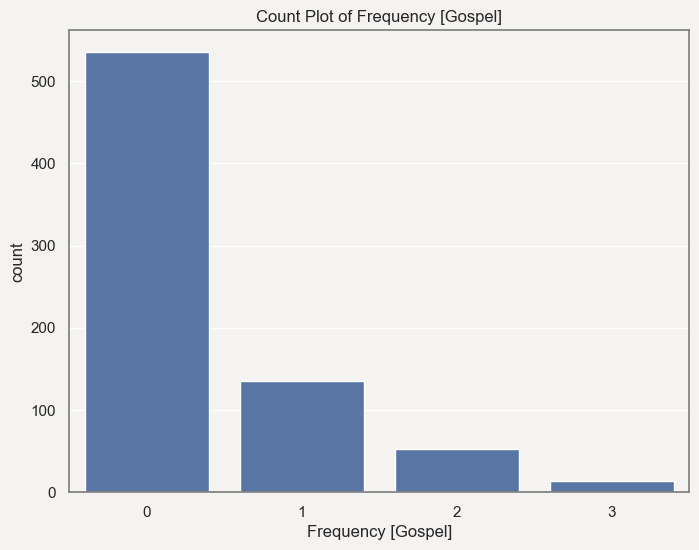

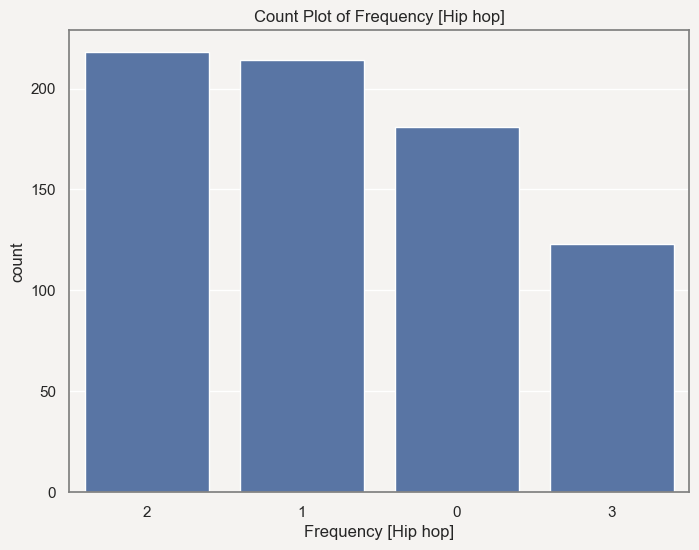

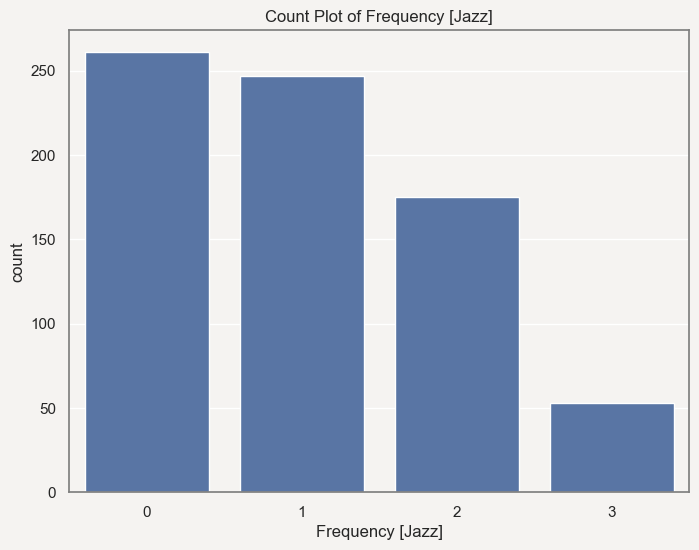

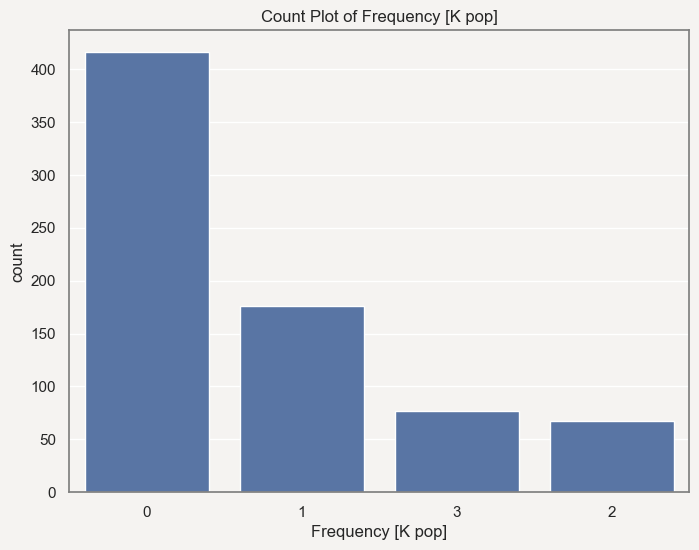

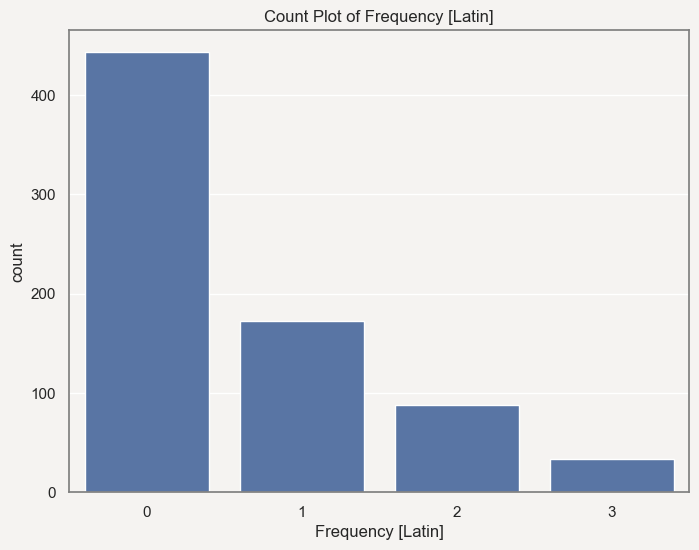

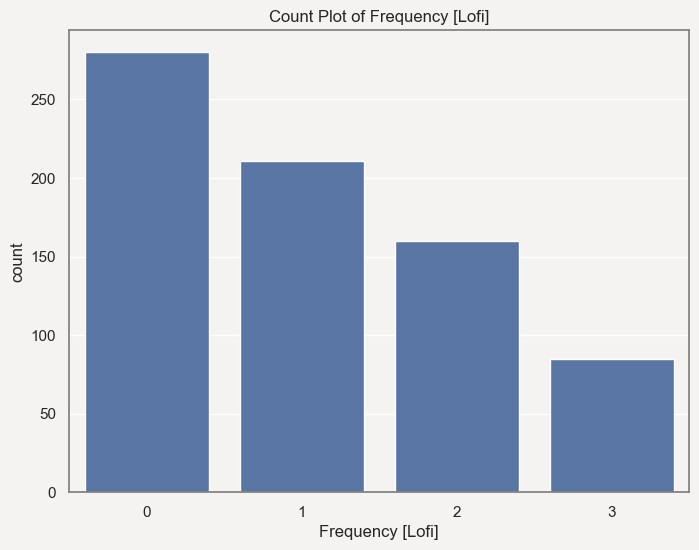

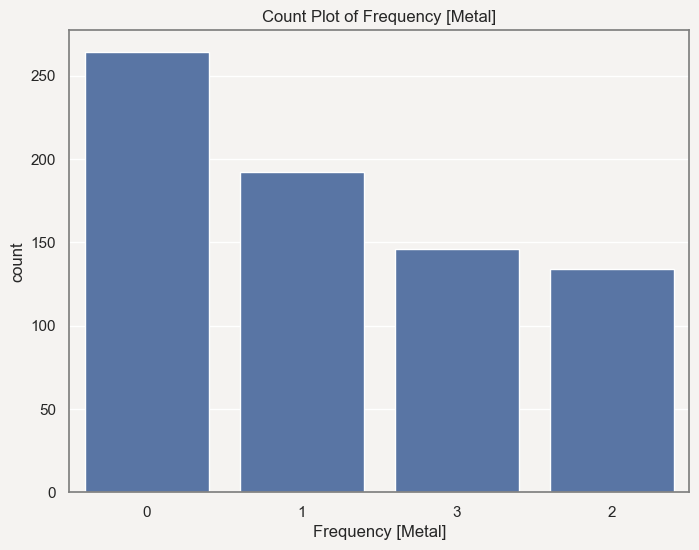

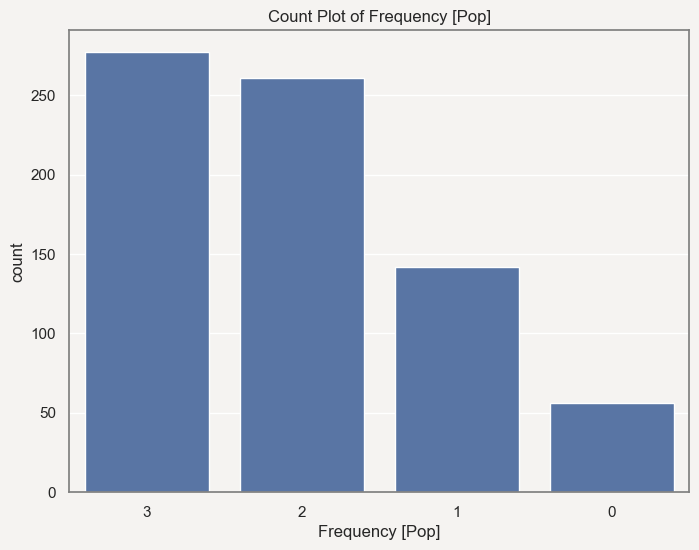

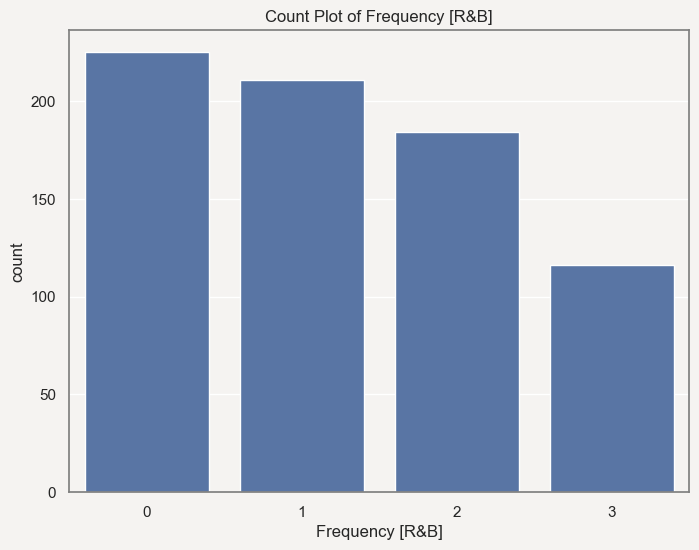

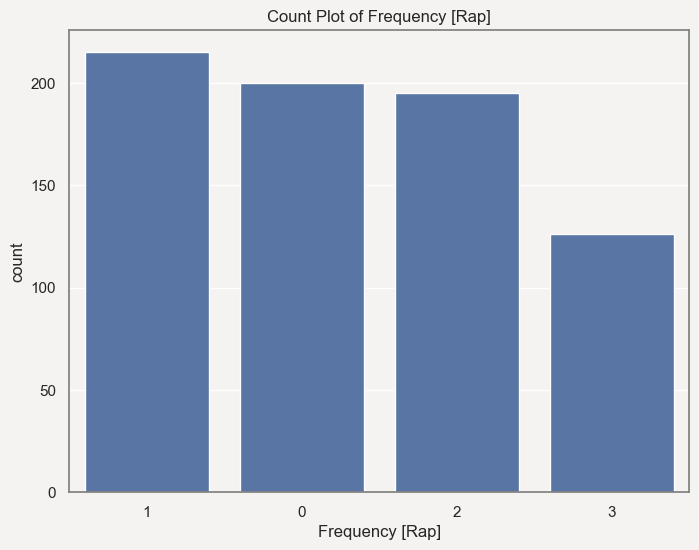

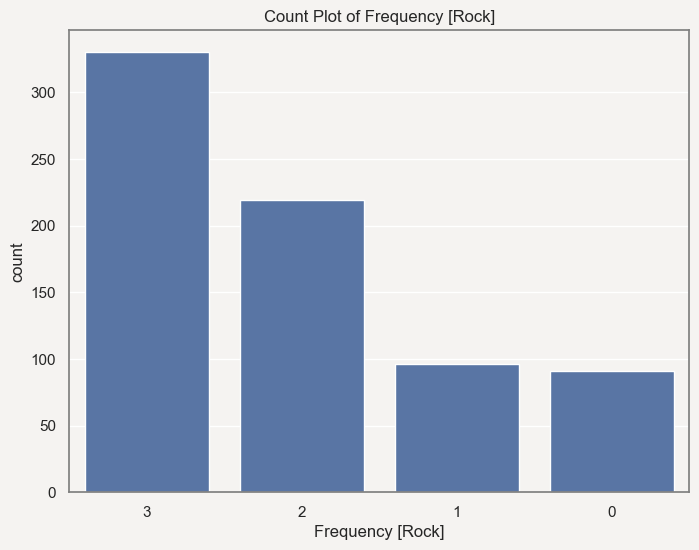

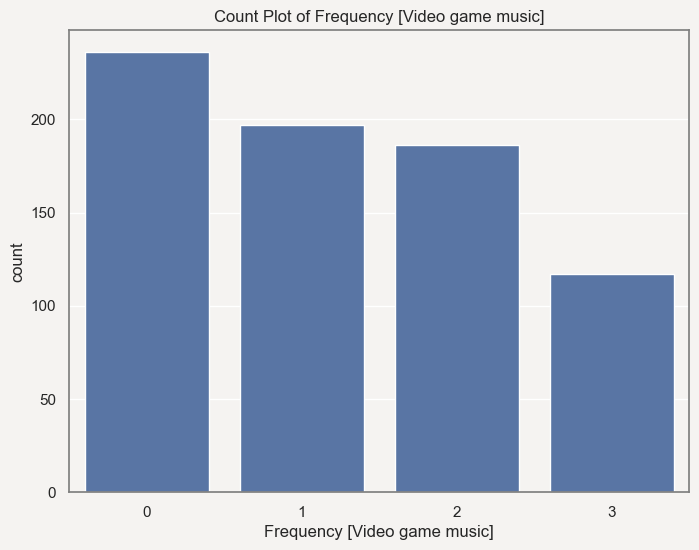

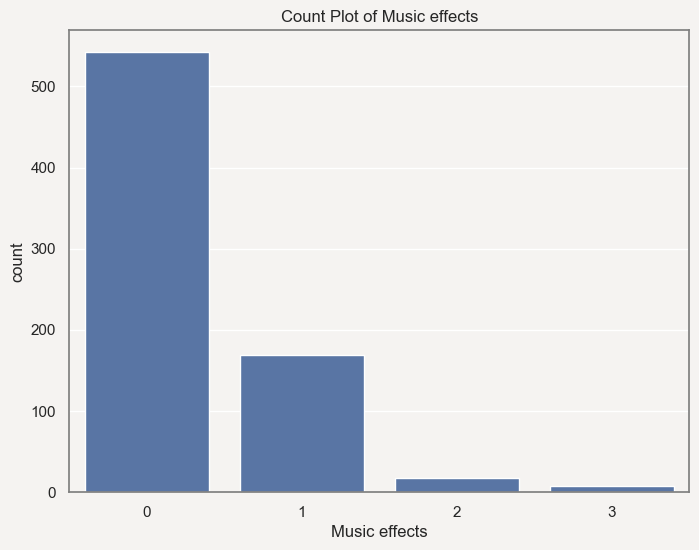

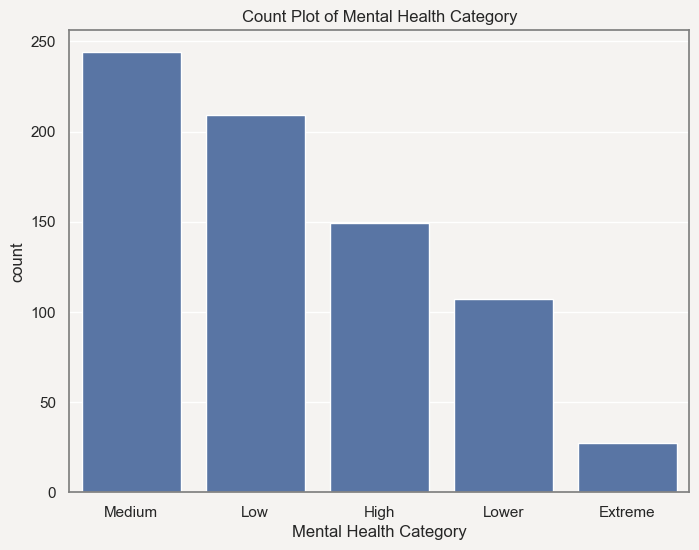

In [115]:
for col in df:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.savefig(f'visuals/{col}Visual.png')
    plt.show()

## Modeling

I have decided to use a Random Forest Algorithm to model my data because I want to understand which features can be associated with mental health. 

First we can start with training the data.

In [116]:
from sklearn.model_selection import train_test_split

X = df.drop('Mental Health Category', axis=1) 
y = df['Mental Health Category'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (588, 26)
X_test (148, 26)
y_train (588,)
y_test (148,)


Next I have to get the model working.

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

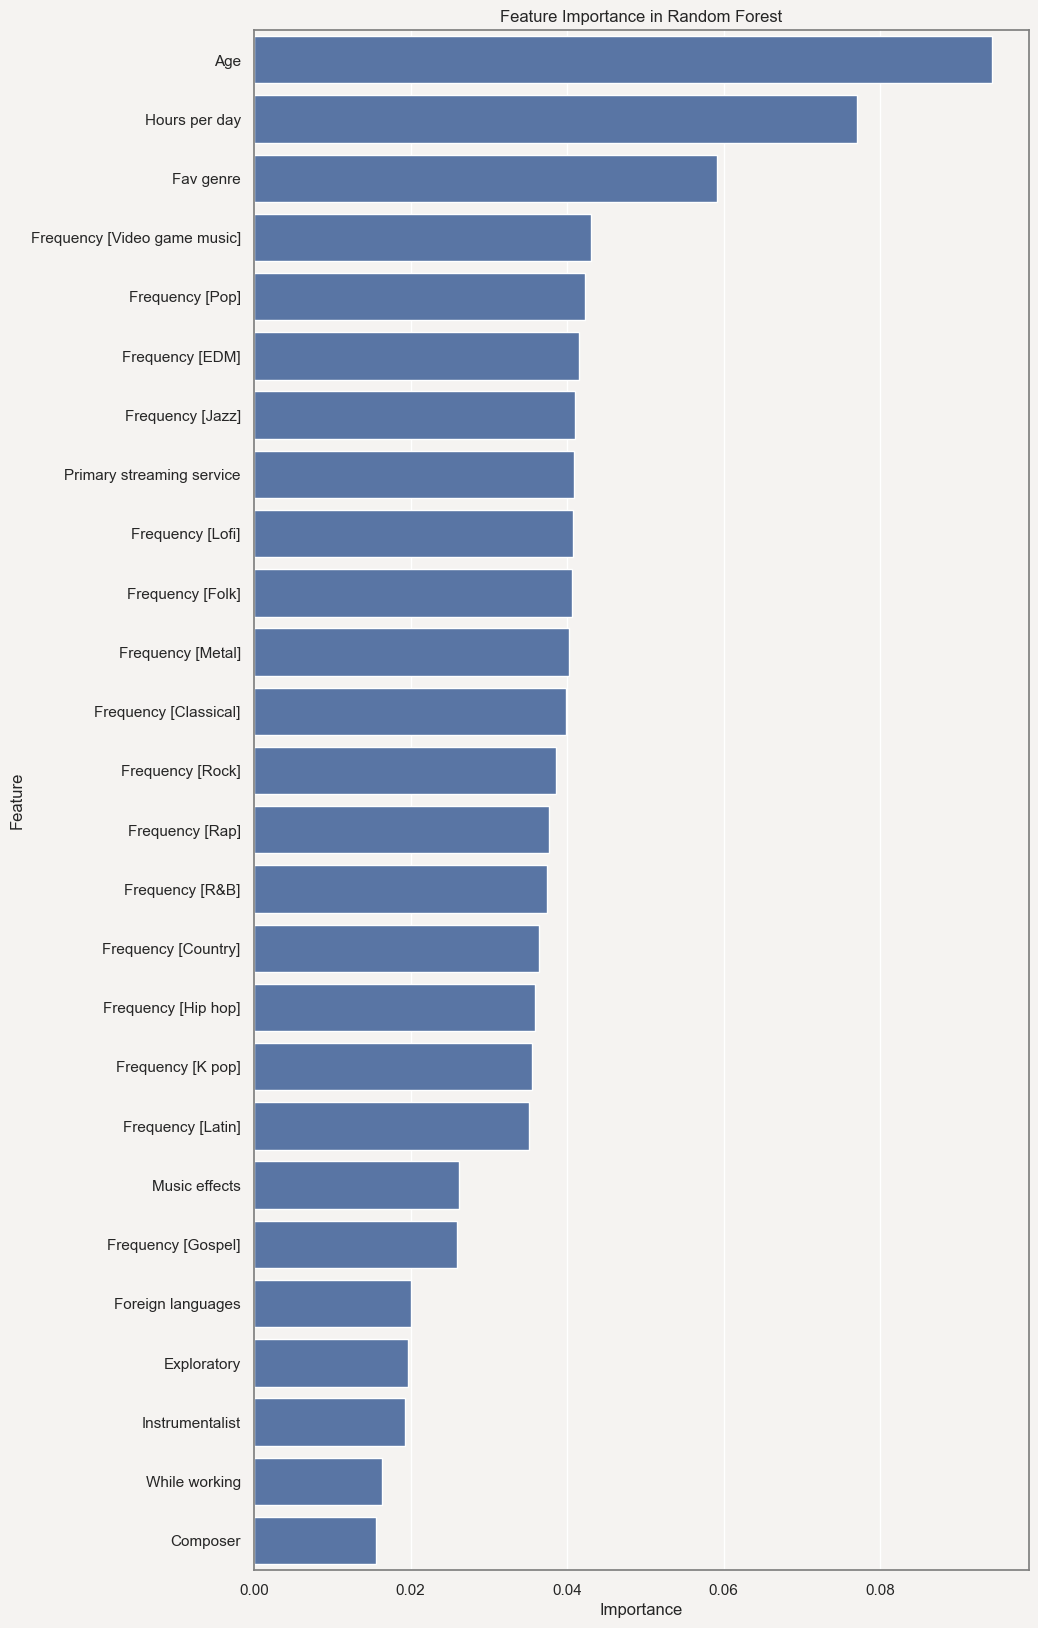

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
sns.set(rc={'axes.facecolor':'#f5f3f1', 'figure.facecolor':'#f5f3f1', 'axes.edgecolor':'grey', 'axes.grid':True, 'grid.color':'white'})
plt.title('Feature Importance in Random Forest')
plt.savefig('FeatureImportance.png')
plt.show()

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
y_pred = rf.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)

In [123]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Lower', 'Low', 'Medium', 'Low', 'Low',
       'Lower', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'Lower', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'High', 'Low', 'Medium', 'Medium', 'Lower', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium',

In [124]:
accuracy

0.31756756756756754

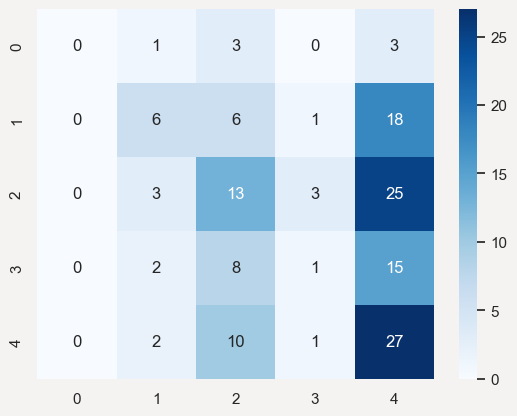

In [125]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.savefig('confusionMatrix.png')
plt.show()

In [131]:
from sklearn import metrics

In [132]:
predicted = rf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     Extreme       0.00      0.00      0.00         7
        High       0.43      0.19      0.27        31
         Low       0.33      0.30      0.31        44
       Lower       0.17      0.04      0.06        26
      Medium       0.31      0.68      0.42        40

    accuracy                           0.32       148
   macro avg       0.25      0.24      0.21       148
weighted avg       0.30      0.32      0.27       148



C:\Users\filip\anaconda3\envs\ITCS3162\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\filip\anaconda3\envs\ITCS3162\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\filip\anaconda3\envs\ITCS3162\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [126]:
from sklearn import tree

In [127]:
clf = tree.DecisionTreeClassifier()

In [128]:
clf = clf.fit(X_train, y_train)

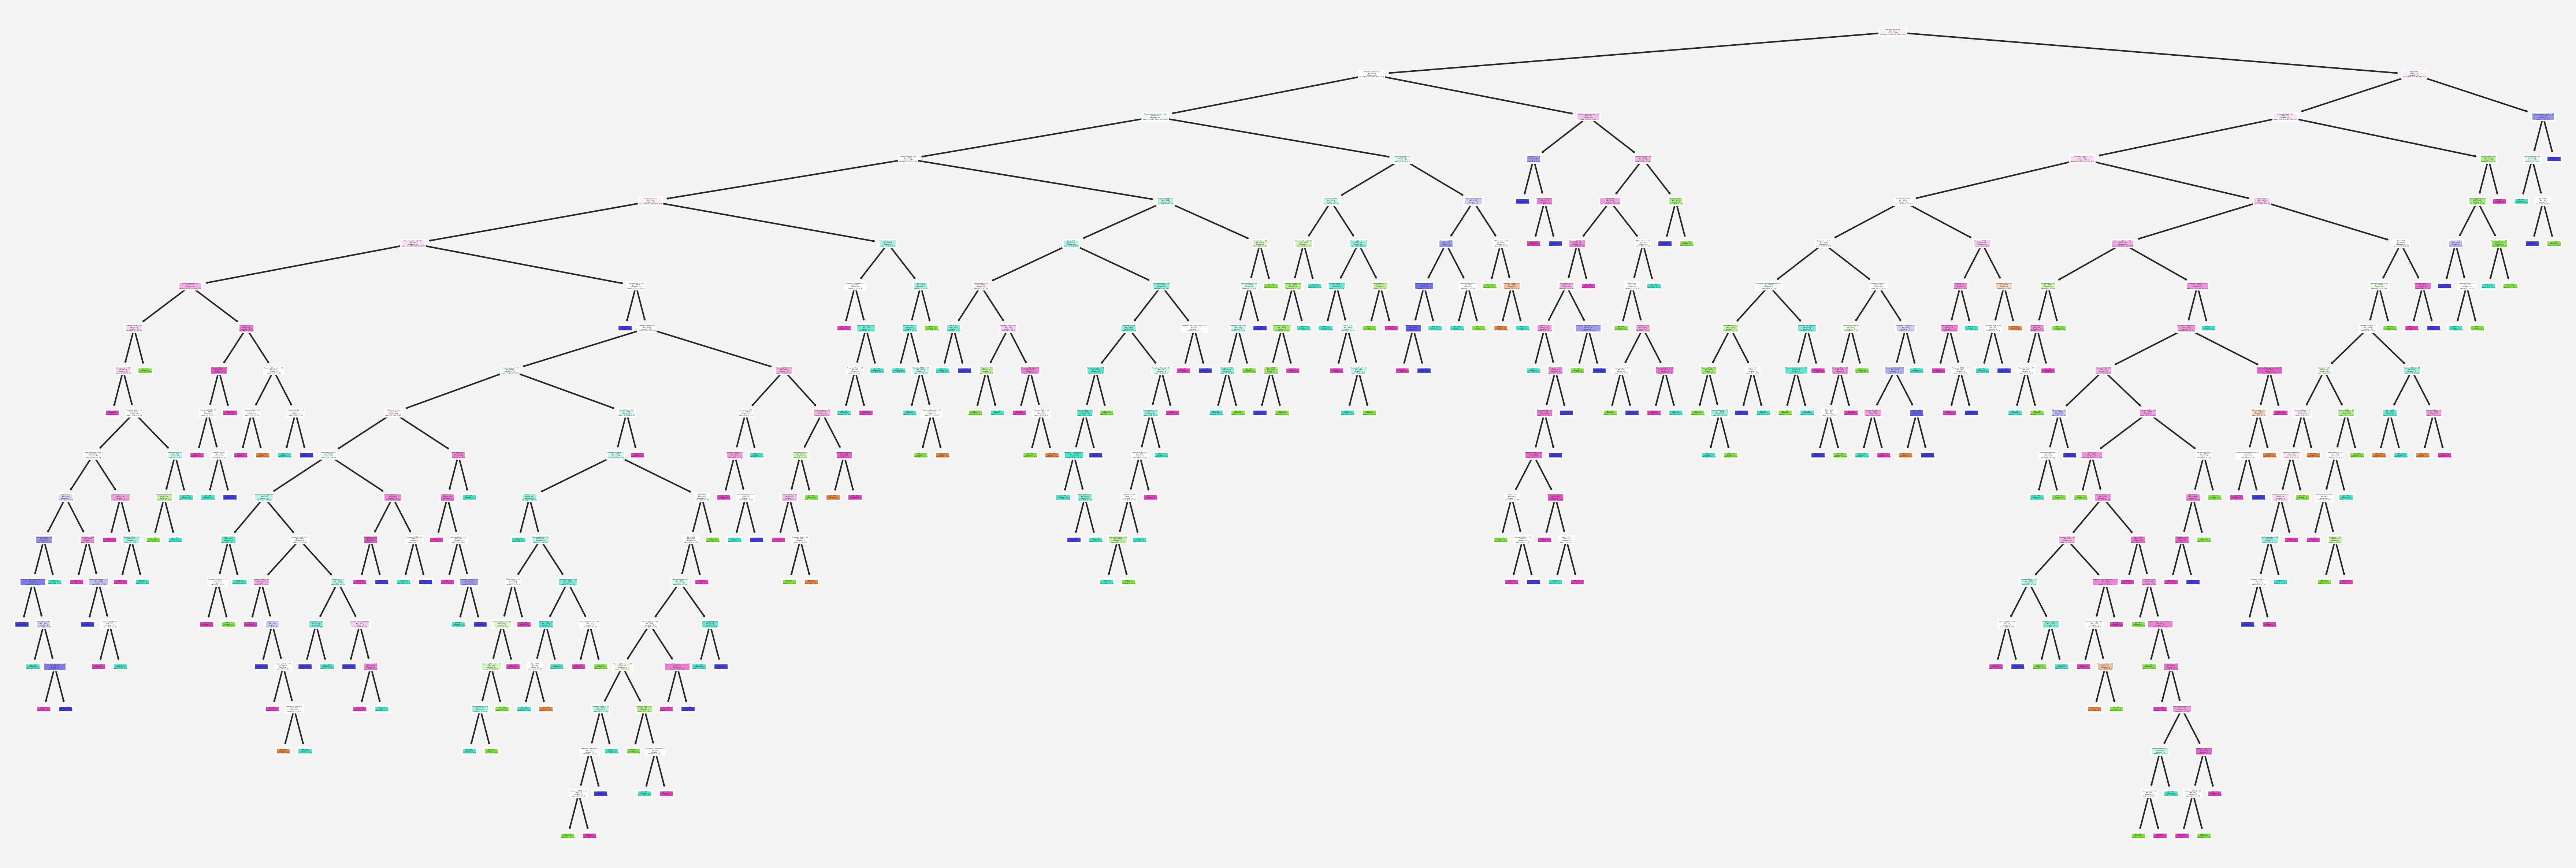

In [129]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (30,10), dpi=300)
tree.plot_tree(clf, feature_names = X.columns, filled=True)
plt.show()
